# Lab 03 - Extended Exercises on Mixed Models

We recommend using Noto for this lecture tutorial, where we've already installed the dependencies of the pymer4 package and statsmodels.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import the linear regression model class
from pymer4.models import Lm

# Import the lmm model class
from pymer4.models import Lmer

# Import Gaussian modeling
import statsmodels.formula.api as smf

import scipy as sp
from scipy import stats

# Data directory
DATA_DIR = "./../../data/"

In [2]:
import requests

exec(requests.get("https://courdier.pythonanywhere.com/get-send-code").content)

npt_config = {
    'session_name': 'lab-03',
    'session_owner': 'mlbd',
    'sender_name': input("Your name: "),
}

## Introduction
The data has already been cleaned and it comes from 29 students in 3 different groups in a course of 26 weeks.

In this lab you will explore different models to explain the quiz grade. 

In [3]:
# Load data
df= pd.read_csv(f'{DATA_DIR}grades_in_time.csv.gz')
#send(len(df),0)
df.head()

,student,week,studying_hours,group,quiz_grade
0,0,0,39.9,3,6.1
1,0,1,32.4,3,7.0
2,0,2,17.5,3,6.9
3,0,3,16.0,3,7.0
4,0,4,15.9,3,7.2


In [4]:
df.describe(include='all')

,student,week,studying_hours,group,quiz_grade
count,810.000000,810.000000,810.000000,810.000000,810.000000
mean,14.500000,13.000000,10.050617,1.933333,6.931975
std,8.660789,7.793693,8.270041,0.772199,1.336888
min,0.000000,0.000000,1.000000,1.000000,1.200000
25%,7.000000,6.000000,5.700000,1.000000,6.400000
50%,14.500000,13.000000,7.800000,2.000000,7.200000
75%,22.000000,20.000000,11.100000,3.000000,7.800000
max,29.000000,26.000000,64.000000,3.000000,10.100000


# Task 1: Linear Model
----------
### 1.1 Preprocess the data to run a regression model to explain the effect of studying hours on quiz grade.  

In [5]:
# Preprocess the dataframe df for linear regression analysis on studying hours effect on quiz grade
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['studying_hours']
X = df[columns_to_scale]
scaler = StandardScaler()
X = scaler.fit_transform(X)
df[columns_to_scale] = X
df.head()

,student,week,studying_hours,group,quiz_grade
0,0,0,3.611569,3,6.1
1,0,1,2.704121,3,7.0
2,0,2,0.901324,3,6.9
3,0,3,0.719834,3,7.0
4,0,4,0.707735,3,7.2


### 1.2 Explain your preprocessing steps

In [5]:
answer = """
Your answer here.
"""

send(answer, 12) 

<Response [200]>

### 1.3 Run a regression model to explain the effect of studying hours on quiz grade.  

In [18]:
# Use LM to fit the model
model = Lm("quiz_grade ~ 0 + studying_hours", data=df)
# What is the default family of the model?
print(model.family)
# Fit the models
print(model.fit())

gaussian
Formula: quiz_grade~0+studying_hours

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 810	 R^2: 0.007	 R^2_adj: 0.006

Log-likelihood: -2729.422 	 AIC: 5460.844	 BIC: 5465.541

Fixed effects:

                Estimate  2.5_ci  97.5_ci     SE   DF  T-stat  P-val Sig
studying_hours     0.603   0.118    1.089  0.247  809   2.439  0.015   *


### 1.4 What model family (poisson, logistic, etc) did you use and why? 

In [6]:
answer = """
Your answer here.
"""

send(answer, 14) 

<Response [200]>

### 1.5 Interpret the regression results. 
Do the variables have a positive or negative effect? Is it significant?

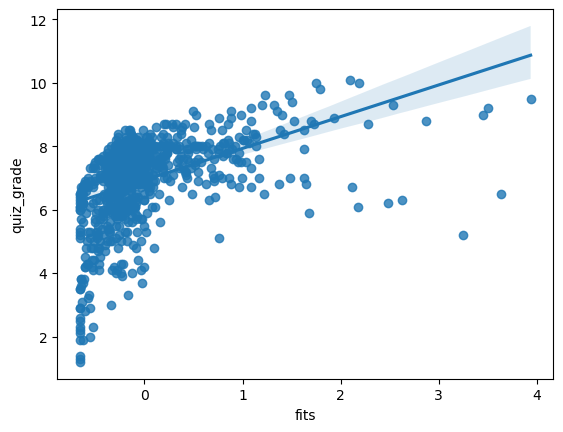

In [19]:
# import dataviz
import seaborn as sns

# plot model predicted values against true values
sns.regplot(x="fits", y="quiz_grade", data=model.data, fit_reg=True)

answer = """
Your answer here.
"""



### 1.6 Is this an appropriate method? Explain why or why not.

In [20]:
answer = """
Your answer here.
"""

#send(answer, 16) 

In [24]:
# Now do we same but this time have an intercept as well
model = Lm("quiz_grade ~ 1 + studying_hours", data=df)
model.fit()

Formula: quiz_grade~1+studying_hours

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 810	 R^2: 0.204	 R^2_adj: 0.203

Log-likelihood: -1291.688 	 AIC: 2587.376	 BIC: 2596.770

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
Intercept,6.932,6.850,7.014,0.042,808,165.288,0.0,***
studying_hours,0.603,0.521,0.686,0.042,808,14.384,0.0,***


# Task 2: Linear Model with Fixed Effects
----------
### 2.1  Run a regression model to explain the effect of studying hours on quiz grade. Add fixed effects for group. 

In [220]:
model_str = """Write your model here """
send(model_str, 21)
# Add the data and family
model = Lm(model_str, data=, family= )

# Fit the models
print(model.fit())

### 2.2 Interpret the regression results. 
What changed? What does it mean to have group fixed effects? 

In [128]:
answer = """
Your answer here.
"""

send(answer, 22) 

<Response [200]>

# Task 3: Linear Model with Random Effects
----------
### 3.1  Run a regression model to explain the effect of studying hours on quiz grade. Add random intercept for group. 

In [85]:
# We again use LM to train a model but this time we add random intercept for group
model = Lmer("quiz_grade ~ studying_hours + (1|group)", data=df)

# Fit the models
print(model.fit())
model.ranef

Linear mixed model fit by REML [’lmerMod’]
Formula: quiz_grade~studying_hours+(1|group)

Family: gaussian	 Inference: parametric

Number of observations: 810	 Groups: {'group': 3.0}

Log-likelihood: -1282.909 	 AIC: 2573.817

Random effects:

                 Name    Var    Std
group     (Intercept)  0.084  0.289
Residual               1.369  1.170

No random effect correlations specified

Fixed effects:

                Estimate  2.5_ci  97.5_ci     SE       DF  T-stat  P-val  Sig
(Intercept)        6.927   6.589    7.264  0.172    2.004  40.249  0.001  ***
studying_hours     0.645   0.562    0.728  0.042  807.849  15.263  0.000  ***


,X.Intercept.
1,-0.320457
2,0.200180
3,0.120278


In [88]:
model.coefs

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),6.926649,6.589351,7.263946,0.172094,2.004041,40.249269,6.091769e-04,***
studying_hours,0.644949,0.562128,0.727769,0.042256,807.849278,15.262826,2.109552e-46,***


### 3.2 Plot the regression lines
Hint: You may use model.plot

<Axes: xlabel='studying_hours', ylabel='quiz_grade'>

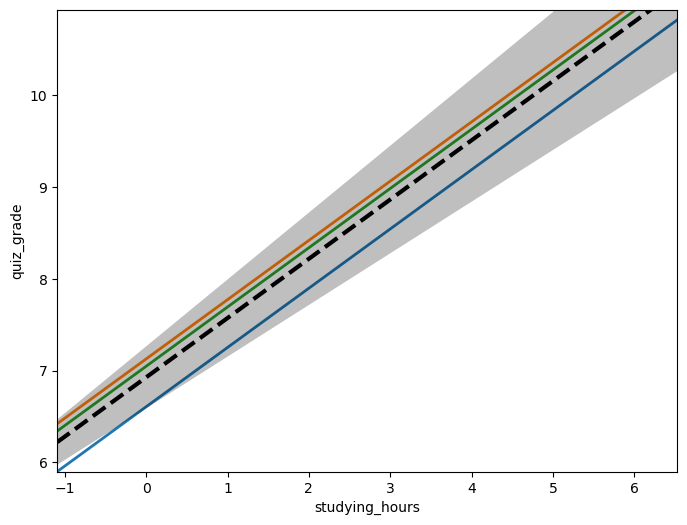

In [17]:
# plot model predicted values against true values
model.plot("studying_hours", plot_ci=True)

### 3.3  Run a regression model to explain the effect of studying hours on quiz grade. Add slope for group. 

In [91]:
model = Lmer("""quiz_grade ~ 1 + (0 + studying_hours|group)""", data=df, family='gaussian')

model.fit()

Linear mixed model fit by REML [’lmerMod’]
Formula: quiz_grade~1+(0+studying_hours|group)

Family: gaussian	 Inference: parametric

Number of observations: 810	 Groups: {'group': 3.0}

Log-likelihood: -1230.242 	 AIC: 2466.484

Random effects:

                    Name    Var    Std
group     studying_hours  0.362  0.602
Residual                  1.198  1.094

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),6.853,6.766,6.94,0.044,739.487,154.658,0.0,***


### 3.4 Plot the regression lines
Hint: You may use model.ranef

In [92]:
model.data.head()

,student,week,studying_hours,group,quiz_grade,residuals,fits
0,0,0,3.611569,3,6.1,-0.966341,7.066341
1,0,1,2.704121,3,7.0,-0.012762,7.012762
2,0,2,0.901324,3,6.9,-0.006318,6.906318
3,0,3,0.719834,3,7.0,0.104398,6.895602
4,0,4,0.707735,3,7.2,0.305112,6.894888


In [93]:
# Plot the regression lines for each group
# Get the intercept and slope for each group
intercept = model.coefs.Estimate['(Intercept)']
# Get the slope for each group
model.ranef

,studying_hours
1,1.021431
2,-0.010058
3,0.059044


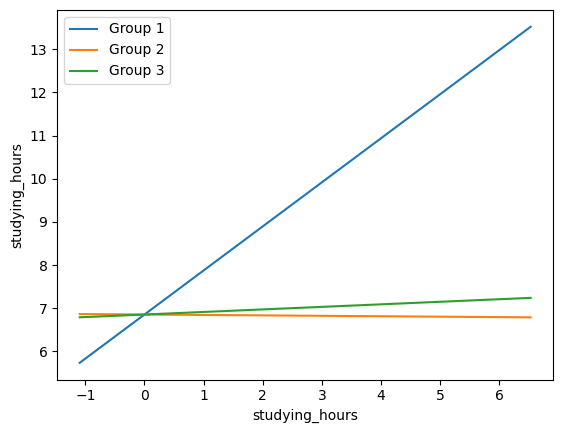

In [100]:
# Plot the regression lines for each group
for i, row in model.ranef.iterrows():
    slope = row['studying_hours']
    sns.lineplot(x=df['studying_hours'], y=intercept + slope * df['studying_hours'], label=f"Group {i}")

### 3.5  Run a regression model to explain the effect of studying hours on quiz grade. Add random intercept and slope for group. 

In [101]:
model = Lmer("""quiz_grade ~ (1 + studying_hours|group) """, data=df, family='gaussian')

# Fit the models
print(model.fit())

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: quiz_grade~(1+studying_hours|group)

Family: gaussian	 Inference: parametric

Number of observations: 810	 Groups: {'group': 3.0}

Log-likelihood: -1205.548 	 AIC: 2421.096

Random effects:

                    Name    Var    Std
group        (Intercept)  0.165  0.406
group     studying_hours  0.410  0.640
Residual                  1.124  1.060

               IV1             IV2  Corr
group  (Intercept)  studying_hours  -1.0

Fixed effects:

             Estimate  2.5_ci  97.5_ci    SE       DF   T-stat  P-val  Sig
(Intercept)      7.18   7.082    7.278  0.05  359.077  143.976    0.0  ***


### 3.6 Plot the regression lines

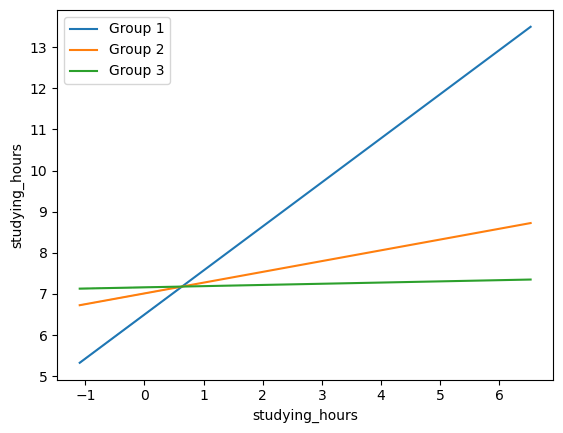

In [105]:
# Get fixed effect intercept
intercept = model.coefs.Estimate['(Intercept)']
for i, row in model.ranef.iterrows():
    slope = row['studying_hours']
    intercept_for_group = row['X.Intercept.'] + intercept
    sns.lineplot(x=df['studying_hours'], y=intercept_for_group + slope * df['studying_hours'], label=f"Group {i}")


### 3.7 Interpret the regression results. 
What changed? What does it mean to have group random effects? 

In [106]:
answer = """
Effects are fixed if they are interesting in themselves
or random if there is interest in the underlying population.
With intercept random effects, we assumed that every group has a different starting 
point (y-intercept) and with slope random effects we assume that every group has a different rate.  
"""

# Task 4: Mixed Model with Time Interaction 
----------
### 4.1  Lastly, run a regression model to explain the effect of studying hours on quiz grade. Add random intercept and slope for groups AND interaction between the number of stuyding hours and time (weeks). 


In [ ]:
model_str = """Write your model here """
send(model_str, 41)
# Add the data and family
model = Lmer(model_str, data=, family= )

# Fit the models
print(model.fit())

### 4.2 Interpret the regression results.  

In [38]:
answer = """
Your answer here.
"""

send(answer, 42) 

<Response [200]>